In [27]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import ensemble
from sklearn.model_selection import cross_val_score


%matplotlib inline

In [4]:
df = pd.read_csv('LoanStats3d.csv',
                skipinitialspace=True,
                header=1)

/usr/local/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (0,19,55) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [31]:
print(df.shape)
df.sample(6)

(421095, 74)


,id,loan_amnt,term,int_rate,grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,...,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
383250,40531027.0,24000.0,60 months,12.39,C,5 years,MORTGAGE,68000.0,Source Verified,Feb-2015,...,0.0,0.0,1.0,94.9,66.7,0.0,0.0,47342.0,18200.0,42576.0
351679,42356056.0,19200.0,36 months,9.99,B,2 years,MORTGAGE,200000.0,Not Verified,Mar-2015,...,0.0,0.0,0.0,100.0,33.3,0.0,0.0,39564.0,27500.0,42468.0
242284,52738934.0,10000.0,60 months,20.99,E,8 years,RENT,42000.0,Source Verified,Jun-2015,...,0.0,0.0,3.0,92.9,50.0,0.0,0.0,41140.0,5800.0,34248.0
272176,50094481.0,3200.0,36 months,7.26,A,10+ years,MORTGAGE,75000.0,Not Verified,May-2015,...,0.0,0.0,3.0,90.0,50.0,0.0,0.0,23733.0,3800.0,25629.0
376341,40846441.0,15000.0,60 months,13.33,C,10+ years,MORTGAGE,47500.0,Not Verified,Feb-2015,...,0.0,0.0,0.0,100.0,37.5,0.0,0.0,65540.0,100600.0,7768.0
127084,60754425.0,12000.0,60 months,12.29,C,< 1 year,MORTGAGE,75000.0,Source Verified,Oct-2015,...,0.0,0.0,0.0,94.7,100.0,0.0,0.0,281676.0,7300.0,250291.0


In [8]:
# Convert ID and Interest Rate to numeric.
df['id'] = pd.to_numeric(df['id'], errors='coerce')
df['int_rate'] = pd.to_numeric(df['int_rate'].str.strip('%'), errors='coerce')

# Drop other columns with many unique variables
df.drop(['url', 'emp_title', 'zip_code', 'earliest_cr_line', 'revol_util',
            'sub_grade', 'addr_state', 'desc'], 1, inplace=True)

In [10]:
# Remove two summary rows at the end that don't actually contain data.
df = df[:-2]

In [12]:
pd.get_dummies(df)
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,68009401.0,72868139.0,16000.0,16000.0,16000.0,60 months,14.85,379.39,C,10+ years,...,0.0,2.0,78.9,0.0,0.0,2.0,298100.0,31329.0,281300.0,13400.0
1,68354783.0,73244544.0,9600.0,9600.0,9600.0,36 months,7.49,298.58,A,8 years,...,0.0,2.0,100.0,66.7,0.0,0.0,88635.0,55387.0,12500.0,75635.0
2,68466916.0,73356753.0,25000.0,25000.0,25000.0,36 months,7.49,777.55,A,10+ years,...,0.0,0.0,100.0,20.0,0.0,0.0,373572.0,68056.0,38400.0,82117.0
3,68466961.0,73356799.0,28000.0,28000.0,28000.0,36 months,6.49,858.05,A,10+ years,...,0.0,0.0,91.7,22.2,0.0,0.0,304003.0,74920.0,41500.0,42503.0
4,68495092.0,73384866.0,8650.0,8650.0,8650.0,36 months,19.89,320.99,E,8 years,...,0.0,12.0,100.0,50.0,1.0,0.0,38998.0,18926.0,2750.0,18248.0


In [14]:
from sklearn import ensemble
from sklearn.model_selection import cross_val_score

rfc = ensemble.RandomForestClassifier()
X = df.drop('loan_status', 1)
Y = df['loan_status']
X = pd.get_dummies(X)
X = X.dropna(axis=1)

cross_val_score(rfc, X, Y, cv=10)

array([0.98029019, 0.98012396, 0.98088385, 0.98154876, 0.97060081,
       0.97874614, 0.97112256, 0.98045548, 0.97967084, 0.9802641 ])

In [16]:
# from https://github.com/WillKoehrsen/machine-learning-project-walkthrough/blob/master/Machine%20Learning%20Project%20Part%201.ipynb# from  
# Function to calculate missing values by column# Funct 
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

missing_values_table(df)

Your selected dataframe has 103 columns.
There are 35 columns that have missing values.


,Missing Values,% of Total Values
dti_joint,420586,99.9
annual_inc_joint,420584,99.9
verification_status_joint,420584,99.9
il_util,402478,95.6
mths_since_rcnt_il,400285,95.1
open_il_12m,399723,94.9
inq_fi,399723,94.9
all_util,399723,94.9
max_bal_bc,399723,94.9
open_rv_24m,399723,94.9


In [18]:
def drop_missing_values(df, percent_drop):
    
    to_drop = [column for column in df if (df[column].isnull().sum()/len(df) >= percent_drop)]

    print('Columns to drop: ' , (len(to_drop)))
    # Drop features 
    df = df.drop(columns=to_drop)
    print('Shape: ', df.shape)
    return df

In [19]:
#dropping columns where >80% of values missing
df = drop_missing_values(df, .8)

Columns to drop:  18
Shape:  (421095, 85)


In [22]:
df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'pymnt_plan', 'purpose', 'title', 'dti', 'delinq_2yrs',
       'inq_last_6mths', 'mths_since_last_delinq', 'open_acc', 'pub_rec',
       'revol_bal', 'total_acc', 'initial_list_status', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'next_pymnt_d', 'last_credit_pull_d', 'collections_12_mths_ex_med',
       'mths_since_last_major_derog', 'policy_code', 'application_type',
       'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim',
       'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util',
       'chargeoff_within_12_mths', 'delinq_amnt', 'mo_sin_old_i

In [25]:
# find correlations to target
corr_matrix = df.corr().abs()

#print(corr_matrix['loan_status'].sort_values(ascending=False).head(20))

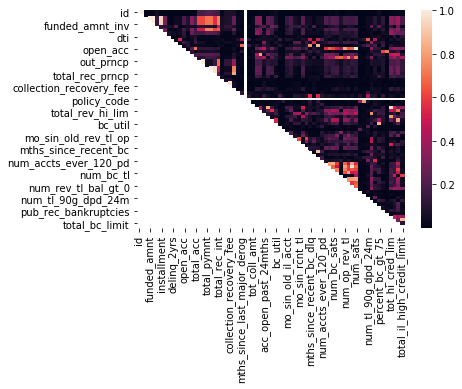

In [28]:
# Select upper triangle of correlation matrix

upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
sns.heatmap(upper)
plt.show;

In [29]:
#dropping highly correlated features
#code from: https://chrisalbon.com/machine_learning/feature_selection/drop_highly_correlated_features/

# Find index of feature columns with correlation greater than 0.90
to_drop = [column for column in upper.columns if any(upper[column] > 0.90)]
print('Columns to drop: ' , (len(to_drop)))

# Drop features 
df = df.drop(columns=to_drop)
print('df shape: ', df.shape)

Columns to drop:  11
df shape:  (421095, 74)


In [30]:
rfc = ensemble.RandomForestClassifier()
X = df.drop('loan_status', 1)
Y = df['loan_status']
X = pd.get_dummies(X)
X = X.dropna(axis=1)

cross_val_score(rfc, X, Y, cv=10)

array([0.97805799, 0.97375983, 0.97981525, 0.97931657, 0.96530515,
       0.97326051, 0.93640314, 0.9791256 , 0.97705845, 0.97850663])